In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.random.rand(3000, 30)
y = np.random.rand(3000, 1)

In [3]:
# Train test split
train_test_ratio = 0.8

In [4]:
# Train folding (cross-val)
n = 10

In [5]:
parameters = [x for x in range(10)]
mse_report = np.zeros((len(parameters), n))

for i in range(n):
    for j, par in enumerate(parameters):
        #create x y
        #fit model on every fold as train except i as test
        #model predict
        mse_report[j, i] = np.random.randint(100) # evalutate(y, y_hat)
        
print(mse_report)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[14. 37. 45.  4. 10. 65. 57. 98. 10. 82.]
 [65. 13. 27. 29. 65. 59.  4. 59. 63. 37.]
 [92. 85. 62. 33. 98. 46. 25. 18. 47. 43.]
 [29. 71. 80. 19. 89. 80. 99. 53. 75. 81.]
 [70. 19. 35. 78. 83. 68. 14. 23. 55. 99.]
 [81. 69. 20. 67. 84. 54. 44. 97. 79. 88.]
 [39. 67. 38. 41. 52. 18. 32. 17. 49. 41.]
 [ 7. 68. 81. 67. 23. 18. 27. 29. 32. 95.]
 [81. 76.  2. 61. 95. 87. 39. 83. 84. 62.]
 [ 7. 78. 22. 89. 99. 45. 96. 86. 92. 68.]]


In [6]:
mu_perf = np.mean(mse_report, axis=1)
print(mu_perf)

[42.2 42.1 54.9 67.6 54.4 68.3 39.4 44.7 67.  68.2]


In [7]:
std_perf = np.std(mse_report, axis=1)
print(std_perf)

[31.3043128  21.86526926 26.84939478 24.62194143 28.35559909 22.05470471
 14.26323946 28.66025122 26.60075187 30.90566291]


In [8]:
max_perf = np.max(mse_report, axis=1)
print(max_perf)

[98. 65. 98. 99. 99. 97. 67. 95. 95. 99.]


In [9]:
min_perf = np.min(mse_report, axis=1)
print(min_perf)

[ 4.  4. 18. 19. 14. 20. 17.  7.  2.  7.]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f24152379e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2415252128>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24152376d8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2415252828>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2415252ba8>,
 'means': []}

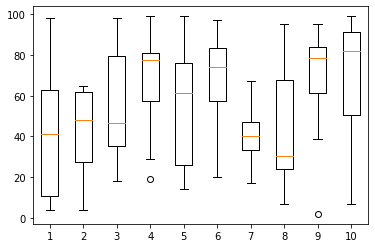

In [10]:
plt.boxplot(mse_report.T)